<a href="https://colab.research.google.com/github/2series/100_Days_of_ML_Code/blob/master/Loan_Prediction(Univariate_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
!pip install analytics

  Using cached https://files.pythonhosted.org/packages/e2/55/3291ed900c1cd6daf8ec5a5fa10c1cffe5c58839f6f9da288f332e22acc5/analytics-0.6.5.tar.gz
    100% |████████████████████████████████| 71kB 5.2MB/s 
    100% |████████████████████████████████| 235kB 7.4MB/s 
  Running setup.py bdist_wheel for analytics ... - done
  Stored in directory: /root/.cache/pip/wheels/11/3c/13/254478b18c6b5343f1c76c4ce9517ee2feedcb0672911d2fbc
  Running setup.py bdist_wheel for nydus ... - done
  Stored in directory: /root/.cache/pip/wheels/9f/4a/04/d2c412106518a5f83ba1ba06a9f223b32af40099f1ed87ec58
  Running setup.py bdist_wheel for python-dateutil ... - done
  Stored in directory: /root/.cache/pip/wheels/3e/57/ae/3a3f171dc8c46ac987fa8d7a56fcc19d82ff1a7151cf46a228
Successfully built analytics nydus python-dateutil
pandas 0.22.0 has requirement python-dateutil>=2, but you'll have python-dateutil 1.5 which is incompatible.
matplotlib 2.1.2 has requirement python-dateutil>=2.1, but you'll have python-dat

In [9]:
#upload dataset
from google.colab import files
files.upload()

Saving Sample_Submission_ZAuTl8O_FK3zQHh.csv to Sample_Submission_ZAuTl8O_FK3zQHh.csv
Saving test_Y3wMUE5_7gLdaTN.csv to test_Y3wMUE5_7gLdaTN (1).csv
Saving train_u6lujuX_CVtuZ9i.csv to train_u6lujuX_CVtuZ9i (1).csv


{'Sample_Submission_ZAuTl8O_FK3zQHh.csv': b'Loan_ID,Loan_Status\r\n',
 'test_Y3wMUE5_7gLdaTN.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area\r\nLP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban\r\nLP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban\r\nLP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban\r\nLP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,,Urban\r\nLP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban\r\nLP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152,360,1,Urban\r\nLP001055,Female,No,1,Not Graduate,No,2226,0,59,360,1,Semiurban\r\nLP001056,Male,Yes,2,Not Graduate,No,3881,0,147,360,0,Rural\r\nLP001059,Male,Yes,2,Graduate,,13633,0,280,240,1,Urban\r\nLP001067,Male,No,0,Not Graduate,No,2400,2400,123,360,1,Semiurban\r\nLP001078,Male,No,0,Not Graduate,No,3091,0,90,360,1,Urban\r\nLP001082,Male,Yes,1,Graduate,,2185,1516,162,360,1,Semiurban\r\nLP001

In [0]:
#reading data
train=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [0]:
#copy of train and test data
train_original=train.copy()
test_original=test.copy()

In [14]:
#structure of the train dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
#structure of test dataset
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have similar features in the test dataset as the train dataset except the Loan_Status. We will predict the Loan_Status using the model built using the train data.

In [16]:
#print data types for each variables
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status

int64: It represents the integer variables. ApplicantIncome is of this format.

float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History



In [17]:
#shape of the dataset
train.shape, test.shape

((614, 13), (367, 12))

We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset.

**Target Variable**
i.e. Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.

In [19]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [20]:
# Normalize can be set to True to print proportions i.e Percentages, rather than numbers
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

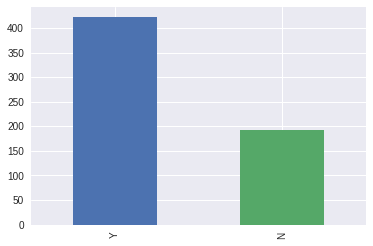

In [21]:
train['Loan_Status'].value_counts().plot.bar()

Loans of 422(around 69%) people out of 614 was approved.

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

**Independent Variable (Categorical) **

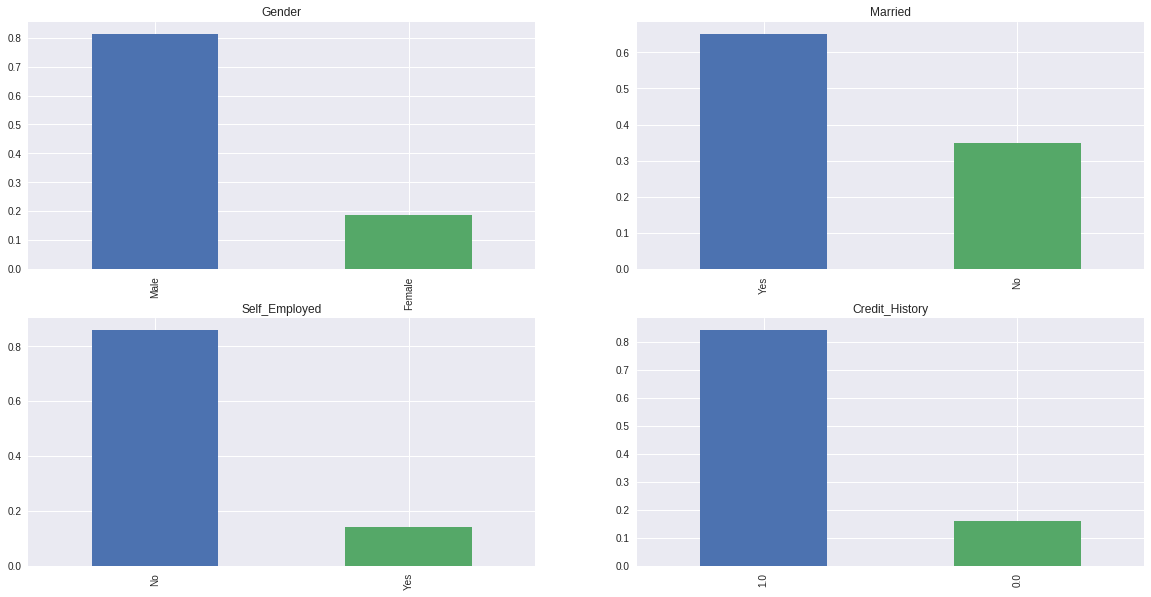

In [25]:
#Let’s visualize the categorical features
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

It can be inferred from the above bar plots that:

80% applicants are male.
Around 65% of the applicants are married.
Around 15% applicants are self employed.
Around 85% applicants have repaid their debts.

**Independent Variable (Ordinal)**

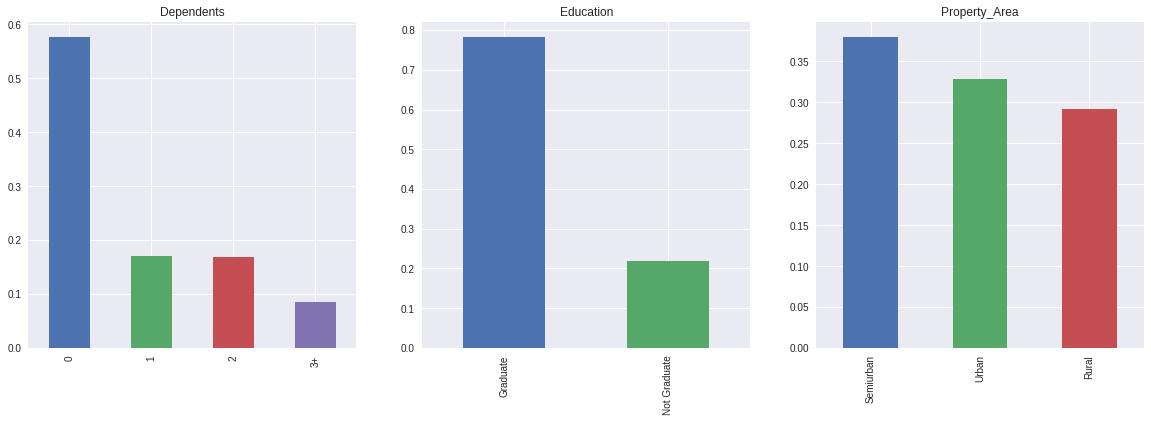

In [27]:
#Let’s visualize the ordinal features
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,6), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

Following inferences can be made from the above bar plots:

Most of the applicants don’t have any dependents.
Around 80% of the applicants are Graduate.
Most of the applicants are from Semiurban area

**Independent Variable (Numerical)**

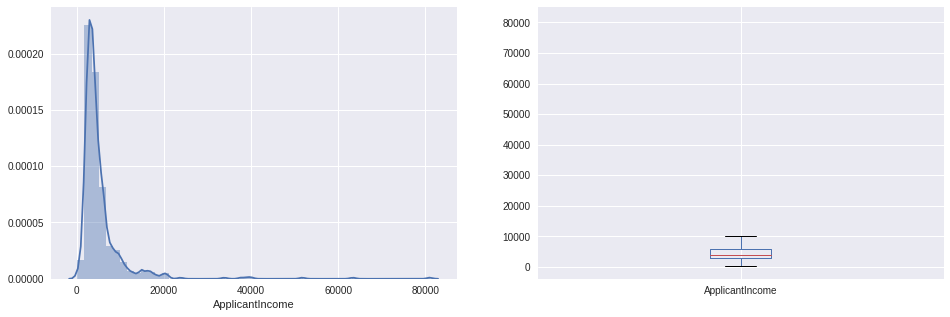

In [34]:
#Let’s visualize the numerical features
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. 

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

Text(0.5,0.98,'')

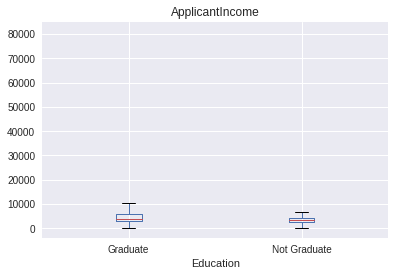

In [29]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.



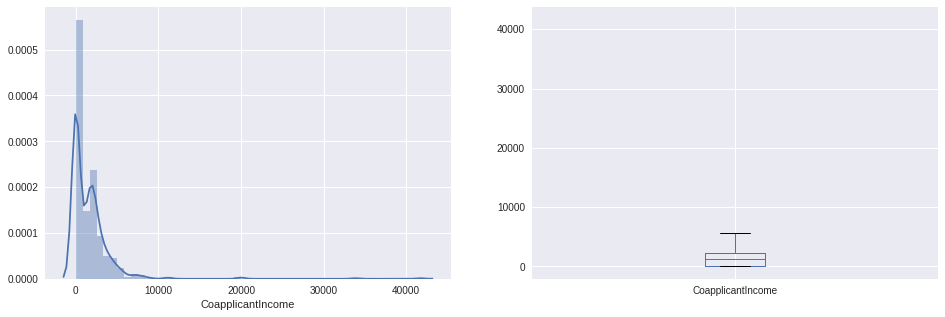

In [30]:
#Let’s look at the Coapplicant income distribution
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

We see a similar distribution as that of the applicant income. 
Majority of coapplicant’s income ranges from 0 to 5000.
We also see a lot of outliers in the coapplicant income and it is not normally distributed.

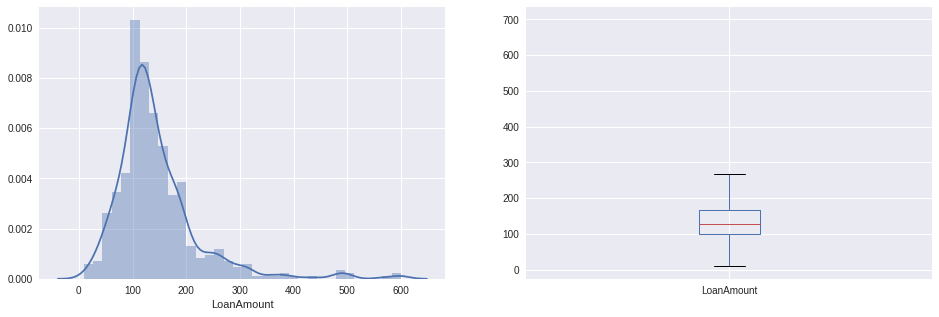

In [31]:
#Let’s look at the distribution of LoanAmount variable
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal.